In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
import datetime
%matplotlib inline


In [222]:
#load csv file data set
vgs = pd.read_csv('http://bit.ly/vgsales' , sep=',')

In [223]:
all_sales = vgs.groupby('Year').agg({'Global_Sales': np.sum, 'NA_Sales': np.sum,'EU_Sales': np.sum, 'JP_Sales': np.sum, 'Other_Sales': np.sum})



<h3>Choose one variable and plot that variable four different ways</h3>

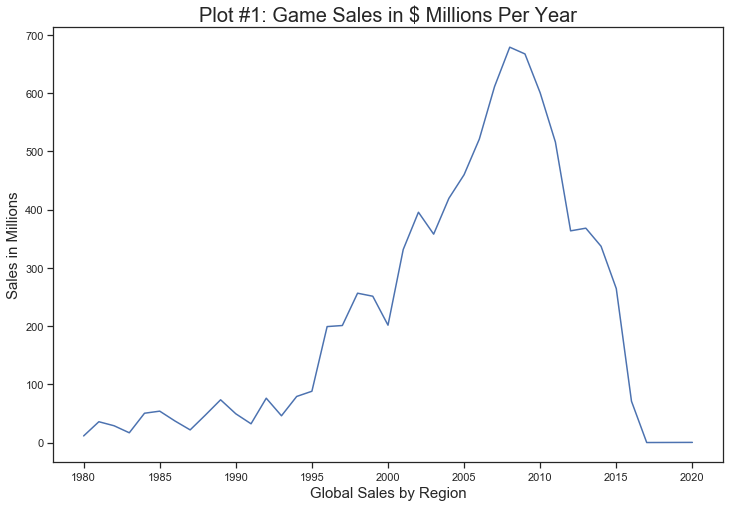

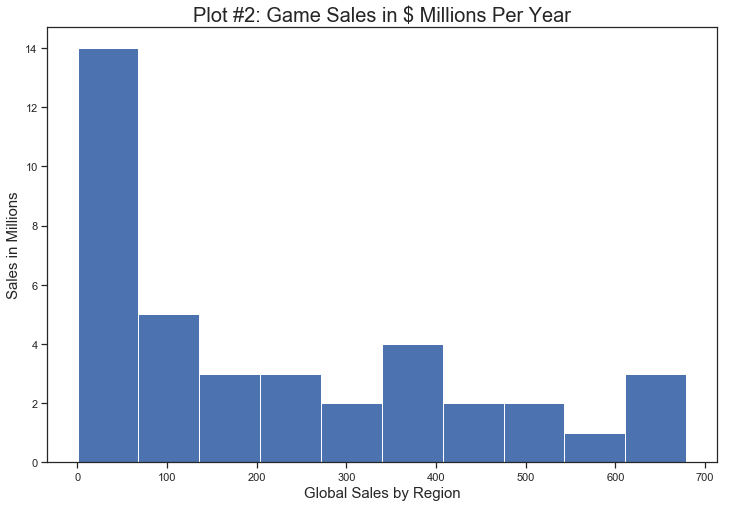

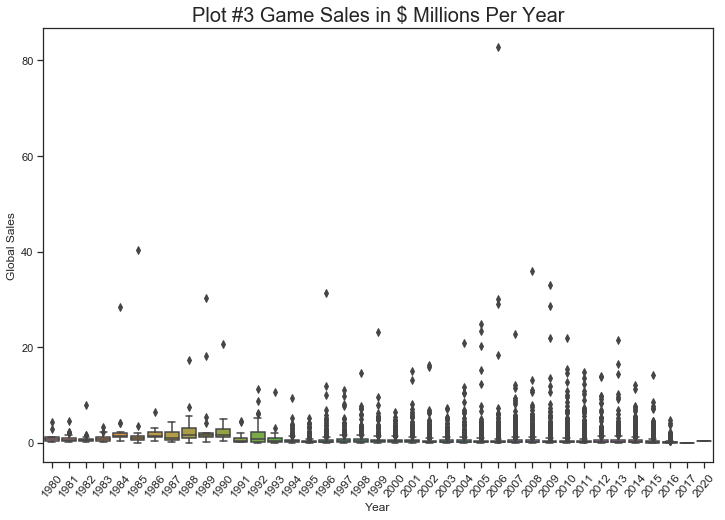

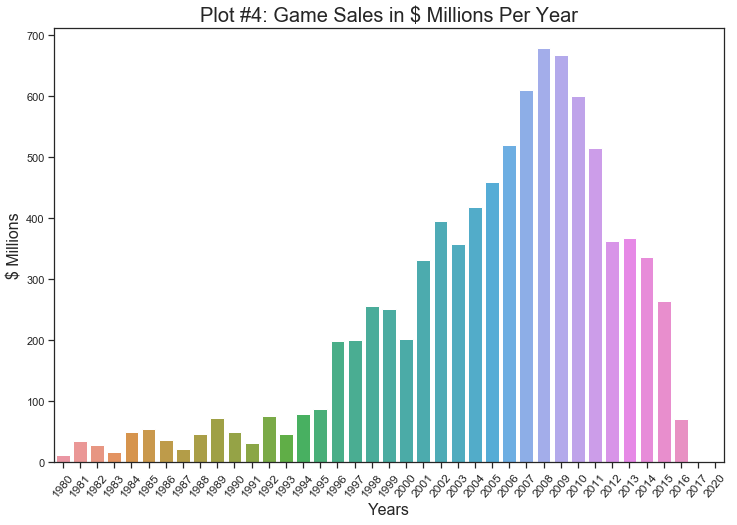

In [224]:


#Line PLot
plt.figure(figsize=(12,8))
plt.plot(all_sales.Global_Sales)
plt.title('Plot #1: Game Sales in $ Millions Per Year', size=20)
plt.xlabel('Global Sales by Region', size=15)
plt.ylabel('Sales in Millions', size=15)
plt.show()

#Histogram
plt.figure(figsize=(12,8))
plt.hist(all_sales.Global_Sales)
plt.title('Plot #2: Game Sales in $ Millions Per Year', size=20)
plt.xlabel('Global Sales by Region', size=15)
plt.ylabel('Sales in Millions', size=15)
plt.show()


#Box Plot
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Year',y='Global_Sales',  data=vgs)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
plt.title('Plot #3 Game Sales in $ Millions Per Year', size=20)
ax.set(xlabel='Year', ylabel='Global Sales')
plt.show()

#Bar Graphs
y = vgs.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Plot #4: Game Sales in $ Millions Per Year', fontsize=20)
plt.show();


<h3>Choose two continuous variables, and plot them three different ways.</h3>

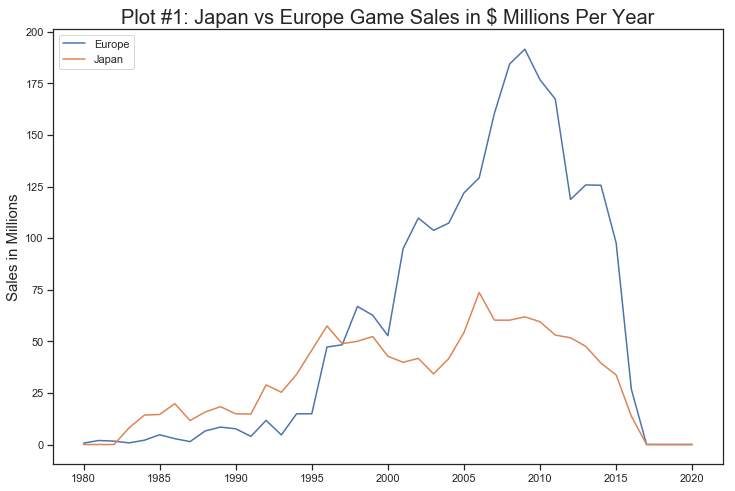

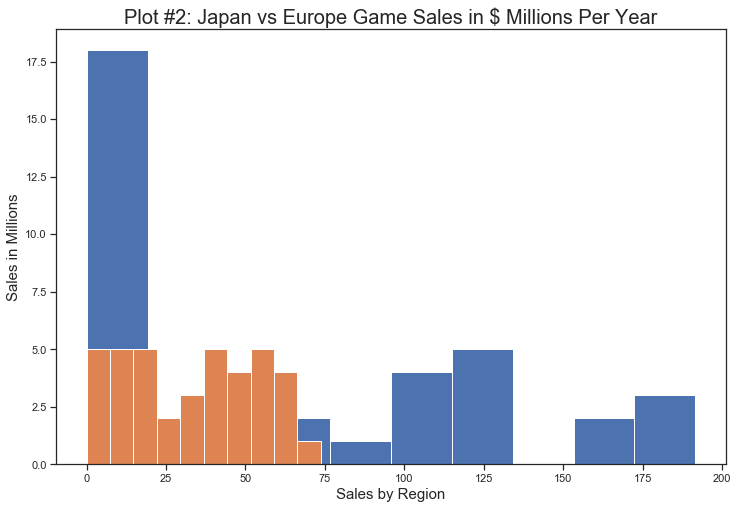

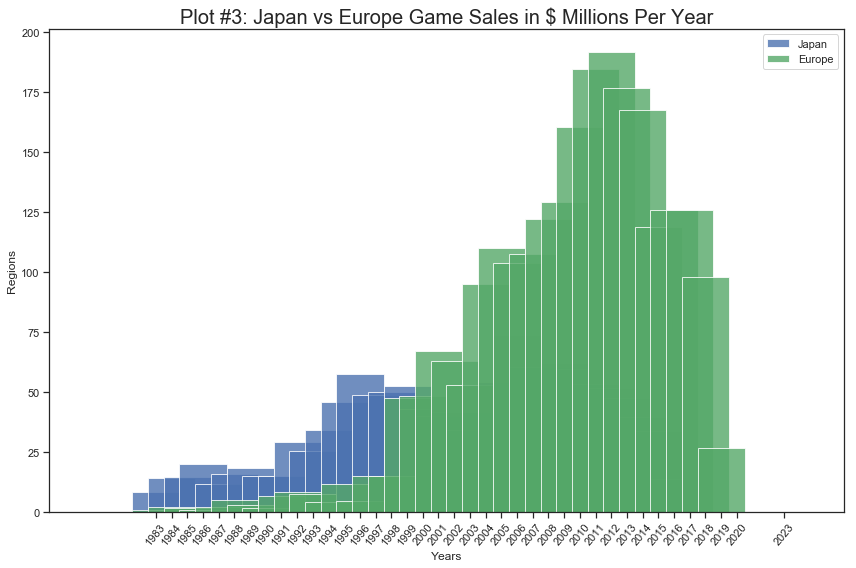

In [225]:
#Choose two continuous variables, and plot them three different ways.

#Line PLot
plt.figure(figsize=(12,8))
plt.plot(all_sales.EU_Sales, label='Europe')
plt.plot(all_sales.JP_Sales, label='Japan')
plt.legend(loc='upper left')
plt.title('Plot #1: Japan vs Europe Game Sales in $ Millions Per Year', size=20)
plt.ylabel('Sales in Millions', size=15)
plt.show()


#Histogram
plt.figure(figsize=(12,8))
plt.hist(all_sales.EU_Sales, label='Europe')
plt.hist(all_sales.JP_Sales, label='Japan')
plt.title('Plot #2: Japan vs Europe Game Sales in $ Millions Per Year', size=20)
plt.xlabel('Sales by Region', size=15)
plt.ylabel('Sales in Millions', size=15)
plt.show()



#Bar Graphs

bar_width = 3
opacity = 0.8

y = vgs.groupby(['Year']).sum()

z = y['JP_Sales']
w = y['EU_Sales']
x = y.index.astype(int)


plt.figure(figsize=(12,8))
rects1 = plt.bar(x, z, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Japan')
 
rects2 = plt.bar(x + bar_width, w, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Europe')
 
plt.xlabel('Years')
plt.ylabel('Regions')
plt.title('Plot #3: Japan vs Europe Game Sales in $ Millions Per Year', size=20)
plt.xticks(x + bar_width, rotation=50)
plt.legend()
 
plt.tight_layout()

plt.show()

<h3>Choose one continuous variable and one categorical variable, and plot them six different ways.</h3>

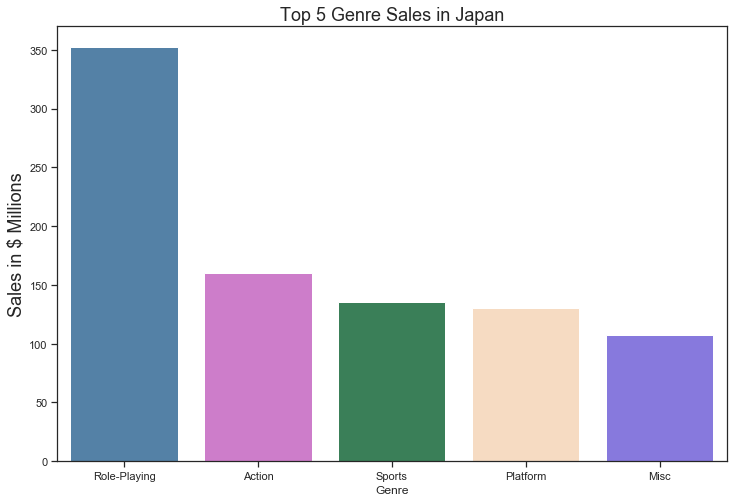

In [235]:
#Bar Pot
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)


colors =  {'Action':"orchid", 'Misc':"mediumslateblue", 'Racing':"goldenrod", 
           'Shooter':"cornflowerblue", 'Role-Playing':"steelblue", 'Platform':"peachpuff", 'Sports':"seagreen"}
fig = plt.figure(figsize=(12,8))
ax.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax, first=False)
JP = vgs.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_genres = JP.index
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Top 5 Genre Sales in Japan', size=18)
plt.ylabel('Sales in $ Millions', size=18)
plt.show()



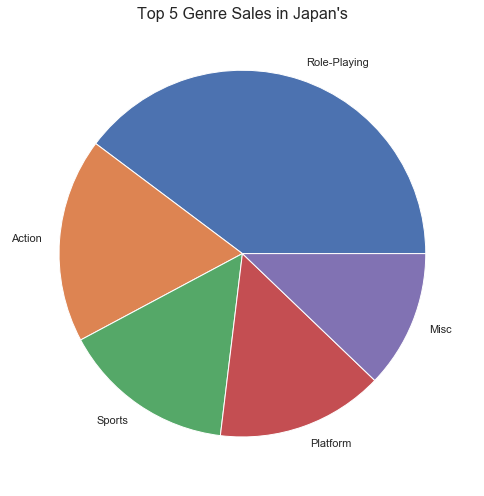

In [237]:
#Pie Chart
f,ax=plt.subplots(figsize=(17,7))
vgs.groupby("Genre")["JP_Sales"].sum().sort_values(ascending=False)[:5].plot.pie()
plt.title("Top 5 Genre Sales in Japan's", size = 16)
plt.ylabel('')
plt.tight_layout()

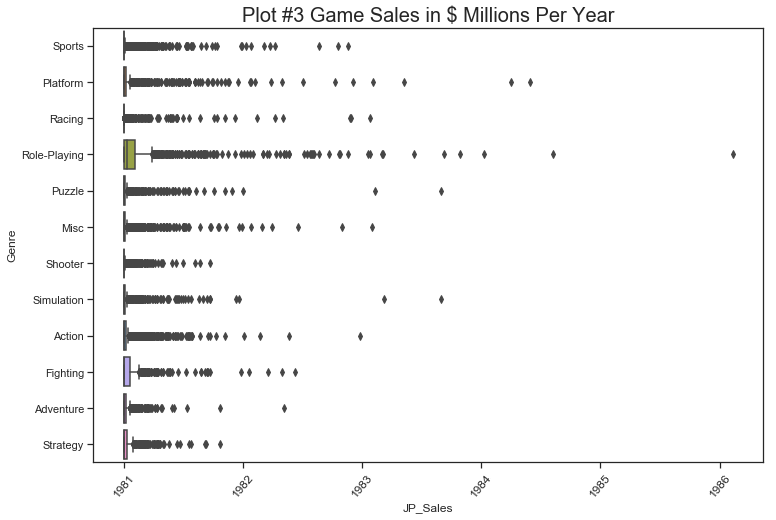

In [243]:
#Box Plot
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='JP_Sales',y='Genre',  data=vgs)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
plt.title('Plot #3 Game Sales in $ Millions Per Year', size=20)

plt.show()